In [458]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline

In [459]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [460]:
cd /content/drive/MyDrive/AAIC/


/content/drive/MyDrive/AAIC


In [461]:
data=pd.read_csv("haberman.csv")

In [462]:
data.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [463]:
data.shape     

(306, 4)

Observation
1.   This data set has 306 data points 

2.   Data set has four features





In [464]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [465]:
data.rename(columns={"status":"survival_status"},inplace=True)

In [466]:
data["survival_status"].unique()

array([1, 2])

Observation
There are two unique survival status 

1.   Staus is in integer format which is not clear so we will convert them 
2.   We will replace survival_staus=1 to yes and survival_status=2 to no



In [467]:
data["survival_status"].replace({1:"yes",2:"no"},inplace=True)

In [468]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              306 non-null    int64 
 1   year             306 non-null    int64 
 2   nodes            306 non-null    int64 
 3   survival_status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


Observation


1.   No cloumns has missing datapoints
2.   three of the data points are of type integer
3.   Survival_status which was of type integer is now of type obect



In [469]:
data.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Observation 




*   Minimum no of nodes =0
*   Maximum no of nodes =52
*   Age vary between 30 to 83



In [470]:
data["survival_status"].isnull().value_counts()

False    306
Name: survival_status, dtype: int64

Observation 
1. We don't have any missing values


---



In [471]:
data["survival_status"].value_counts()

yes    225
no      81
Name: survival_status, dtype: int64

ovservation
*  out of 306 patients 225 patients survived and 81 patients didn't survive
*  also we can say dataset is imbalanced 

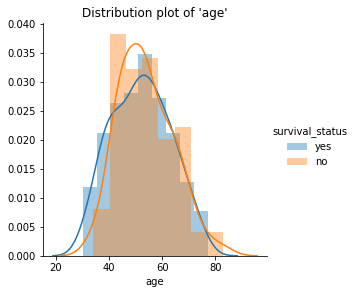

In [472]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.distplot,"age").add_legend().set(title="Distribution plot of 'age'")

Observations
*  Between age 40 and 57 less people tend to survive
*  we will try to calculate the percentage from above graph

In [473]:
total_sur=data[data["survival_status"]=="yes"]
print(total_sur.shape)
sur=total_sur[(total_sur["age"]>=40) & (total_sur["age"]<=57)]
print(sur.shape)
total_not_sur=data[data["survival_status"]=="no"]
print(total_not_sur.shape)
not_sur=total_not_sur[(total_not_sur["age"]>=40) & (total_not_sur["age"]<=57)]
print(not_sur.shape)
percentage_sur_40_57=(sur.shape[0]/total_sur.shape[0])*100
percentage_not_sur_40_57=(not_sur.shape[0]/total_not_sur.shape[0])*100
print("percentage of beople survived between age 40 and 57 is {}".format(percentage_sur_40_57))
print("percentage of people not survived between age 40 and 57 is {}".format(percentage_not_sur_40_57))


(225, 4)
(116, 4)
(81, 4)
(52, 4)
percentage of beople survived between age 40 and 57 is 51.55555555555556
percentage of people not survived between age 40 and 57 is 64.19753086419753


Observations
*  from above figure we saw that between age group 40 and 57 less people could survive
*  Once we calculated that we could see 51.6 % of people survived and 64.2 % people died who all belong to age group 40 and 57

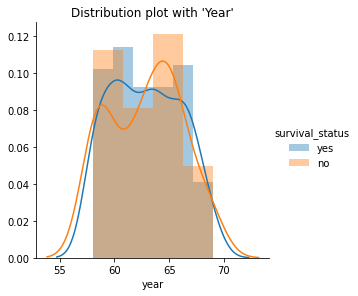

In [474]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.distplot,"year").add_legend().set(title="Distribution plot with 'Year'")

Observations
*  between year 1962 to 1964 less people survived 

In [475]:
t1=total_not_sur[total_not_sur["year"]==63]

t2=total_not_sur[total_not_sur["year"]==65]
t3=total_sur[total_sur["year"]==63]
t4=total_sur[total_sur["year"]==65]
print(t1.shape)
print(t2.shape)
print(t3.shape)
print(t4.shape)
patients_not_survived_in_1965=(t2.shape[0]/total_not_sur.shape[0])*100
patients_survived_in_1965=(t4.shape[0]/total_sur.shape[0])*100
print("{}% patients could survive in year 1965 ".format(int(patients_survived_in_1965)))
print("{}% patients could not survive in year 1965".format(int(patients_not_survived_in_1965)))

(8, 4)
(13, 4)
(22, 4)
(15, 4)
6% patients could survive in year 1965 
16% patients could not survive in year 1965


Observation
*  16% patients didn't survive in 1965
*  only 6% of patients could survive in year 1965
*  there may be some medical challenges which led more death in year 1965

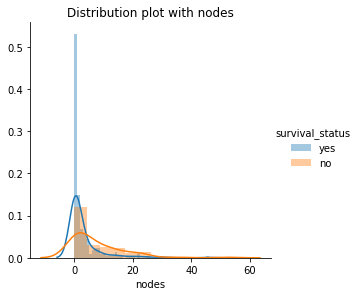

In [476]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.distplot,"nodes").add_legend().set(title="Distribution plot with nodes")


Observation  

1.   patients with 0 lymph nodes tend to survive
2.   as the no of nodes incerases fatelity incerases



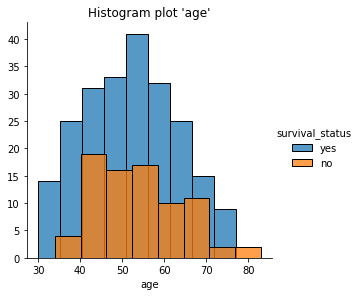

In [477]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.histplot,"age").add_legend().set(title="Histogram plot 'age'")

My Observation 
*  After age 75 no patients could survive
*  Patients of age between 30 to 33 could survive there is no death can be found from histogram plot in this age group

In [478]:
data[(data['survival_status']=='no') & (data['age']<=33)].shape[0]

0

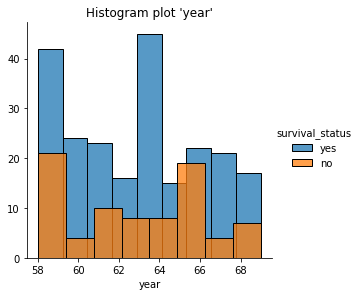

In [479]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.histplot,"year").add_legend().set(title="Histogram plot 'year'")

I couldn't observe anything from above plot as it is compleately overlapping. Year may not be a feature on which we can rely upon

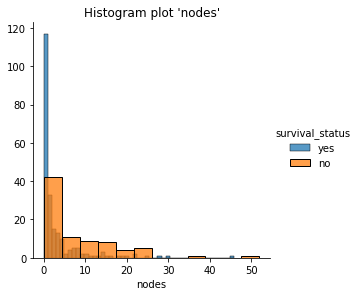

In [480]:
sns.FacetGrid(data,hue="survival_status",height=4).map(sns.histplot,"nodes").add_legend().set(title="Histogram plot 'nodes'")

My observation
*  Approx 120 patients survied who had 0 nodes


In [481]:
data[(data['nodes']==0) & (data['survival_status']=='yes')].shape[0]

117

In [482]:
d1=data[(data['nodes']==0) & (data['survival_status']=='yes')].shape
print("{} patients survived who had 0 nodes".format(d1[0]))
d2=data[(data['nodes']==0) & (data['survival_status']=='no')].shape
print("{} patients couldn't survive who had 0 nodes".format(d2[0]))


117 patients survived who had 0 nodes
19 patients couldn't survive who had 0 nodes


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


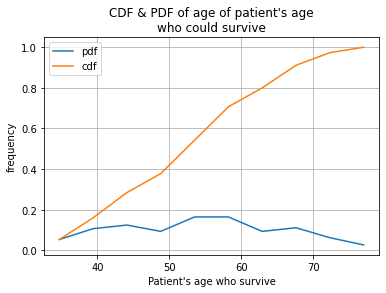

In [483]:
counts, bin_edges = np.histogram(total_sur['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.xlabel("Patient's age who survive")
plt.ylabel("frequency")
plt.title("CDF & PDF of age of patient's age\nwho could survive")


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend(loc="best")
plt.grid()
plt.show()

From CDF we can see patients between age 50 and 60 has heigher rate of survival

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


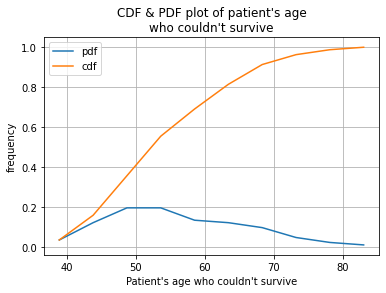

In [484]:
counts, bin_edges = np.histogram(total_not_sur['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.xlabel("Patient's age who couldn't survive")
plt.ylabel("frequency")
plt.title("CDF & PDF plot of patient's age\nwho couldn't survive")


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend(loc="best")
plt.grid()


plt.show();

Patients between age 45 to 55 has heigher rate of death

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


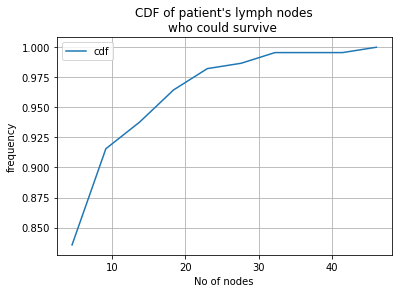

In [485]:
counts, bin_edges = np.histogram(total_sur['nodes'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.xlabel("No of nodes")
plt.ylabel("frequency")
plt.title("CDF of patient's lymph nodes\nwho could survive ")

#compute CDF
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], cdf,label="cdf")
plt.grid()
plt.legend(loc="best")
plt.show();

Approxemitaly 91% survived who had nodes less than 10

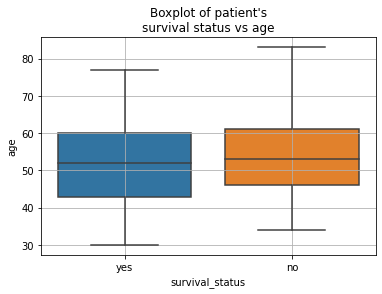

In [486]:
sns.boxplot(y='age',x='survival_status', data=data).set(title="Boxplot of patient's\nsurvival status vs age")
plt.grid()
plt.show()

*  50% of patients who could survive were of age 52 or below
*  50% of patients who couldn't survive were of age 53 or below
*  Nothing much I could find from the above boxplot as plots are almost overlapping

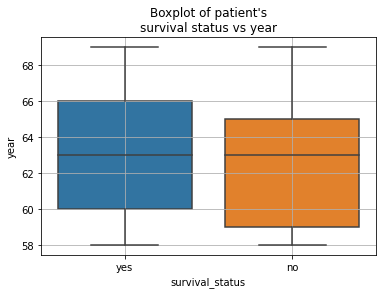

In [487]:
sns.boxplot(y='year',x='survival_status', data=data).set(title="Boxplot of patient's\nsurvival status vs year")
plt.grid()
plt.show()

Plots are almost identical even for "year" as feature

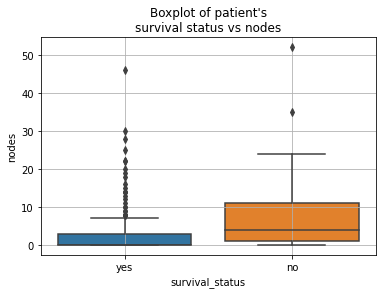

In [488]:
sns.boxplot(y='nodes',x='survival_status', data=data).set(title="Boxplot of patient's\nsurvival status vs nodes")
plt.grid()
plt.show()

Here we see differnt plot for survival status. But there are lot of outliers with survival_status="yes"

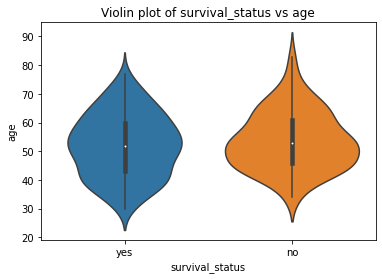

In [489]:
sns.violinplot(x="survival_status", y="age", data=data, size=8).set(title="Violin plot of survival_status vs age")
plt.show()

*  Here we could find same box plot with histogram overlappimg it.

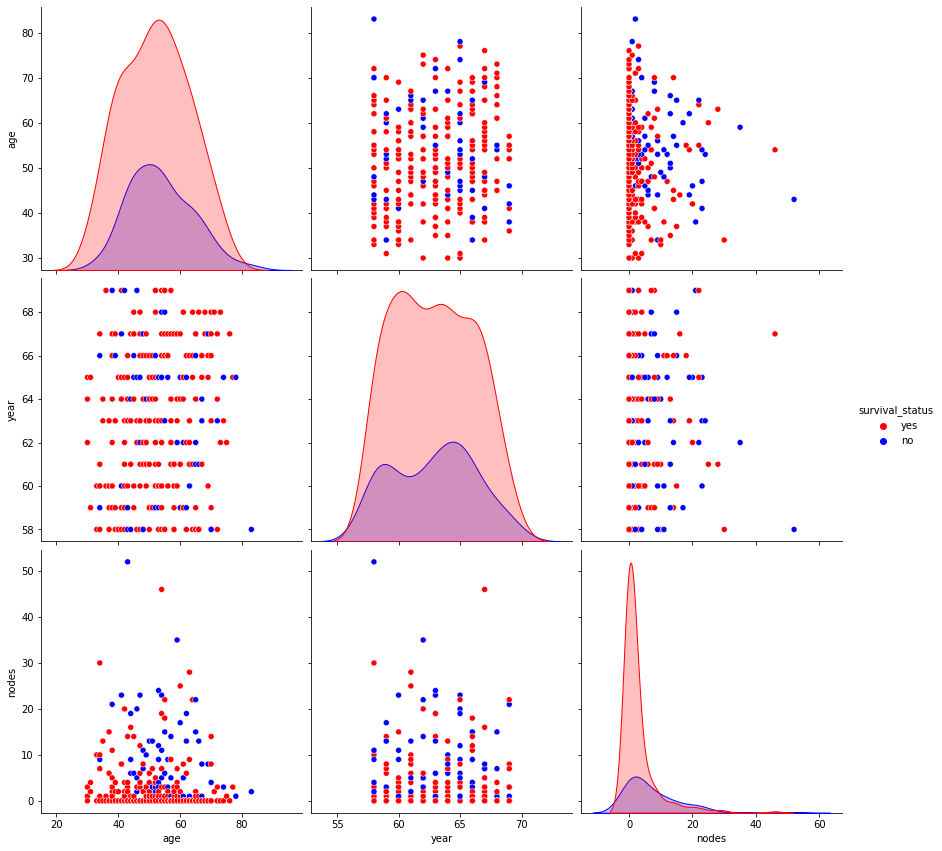

In [490]:
sns.pairplot(data,hue="survival_status",palette={"yes":"r","no":"b"},height=4)

We can see we have almost 90% data which is overlapping so it is hard to predict looking above plots weather given patients could survive or not 

Overall we can see data set is very much unbalanced and nothing much is clear from above pairplots

My Overall conclusion analysing Haberman's dataset are following
*  There are 306 datapoints with 4 features. 
*  age,year and nodes are independent variable
*  survial_status is dependent variable
*  dataset doesn't have any missing values
*  out of 306 patients 225 patients could surive 81 patients couldn't survive
*  age of patients vary between 30 to 83
*  16% patients didn't survive in 1965, that is maximum
*  patients with 0 lymph nodes tend to survive
   *   (Domain knowledge) Lymph nodes:- The more lymph node means there is more chances of patients that they may get cancer detected
*  After age 77 no patients could survive
*  Below age 33 no one died
*  117 patients survived who had 0 nodes which is 38% of the dataset





Nodes can be helpful for deciding weather a patient could survive or not but that is also upto some extaent.
This is my observation exploring the habermans dataset